In [1]:
# import all required libraries
import numpy as np 
import string
from nltk.corpus import stopwords
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline


In [9]:
# importing the dataset
df = pd.read_csv(r"C:\Users\nbala\Desktop\IBM\Dataset\dialogs.txt", sep='\t')

In [10]:
df.head()

,"hi, how are you doing?",i'm fine. how about yourself?
0,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
1,i'm pretty good. thanks for asking.,no problem. so how have you been?
2,no problem. so how have you been?,i've been great. what about you?
3,i've been great. what about you?,i've been good. i'm in school right now.
4,i've been good. i'm in school right now.,what school do you go to?


In [11]:
#add column names
df.columns=['Questions','Answers']
df

,Questions,Answers
0,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
1,i'm pretty good. thanks for asking.,no problem. so how have you been?
2,no problem. so how have you been?,i've been great. what about you?
3,i've been great. what about you?,i've been good. i'm in school right now.
4,i've been good. i'm in school right now.,what school do you go to?
...,...,...
3719,that's a good question. maybe it's not old age.,are you right-handed?
3720,are you right-handed?,yes. all my life.
3721,yes. all my life.,you're wearing out your right hand. stop using...
3722,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


C:\Users\nbala\AppData\Local\Temp\ipykernel_11480\3381884683.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


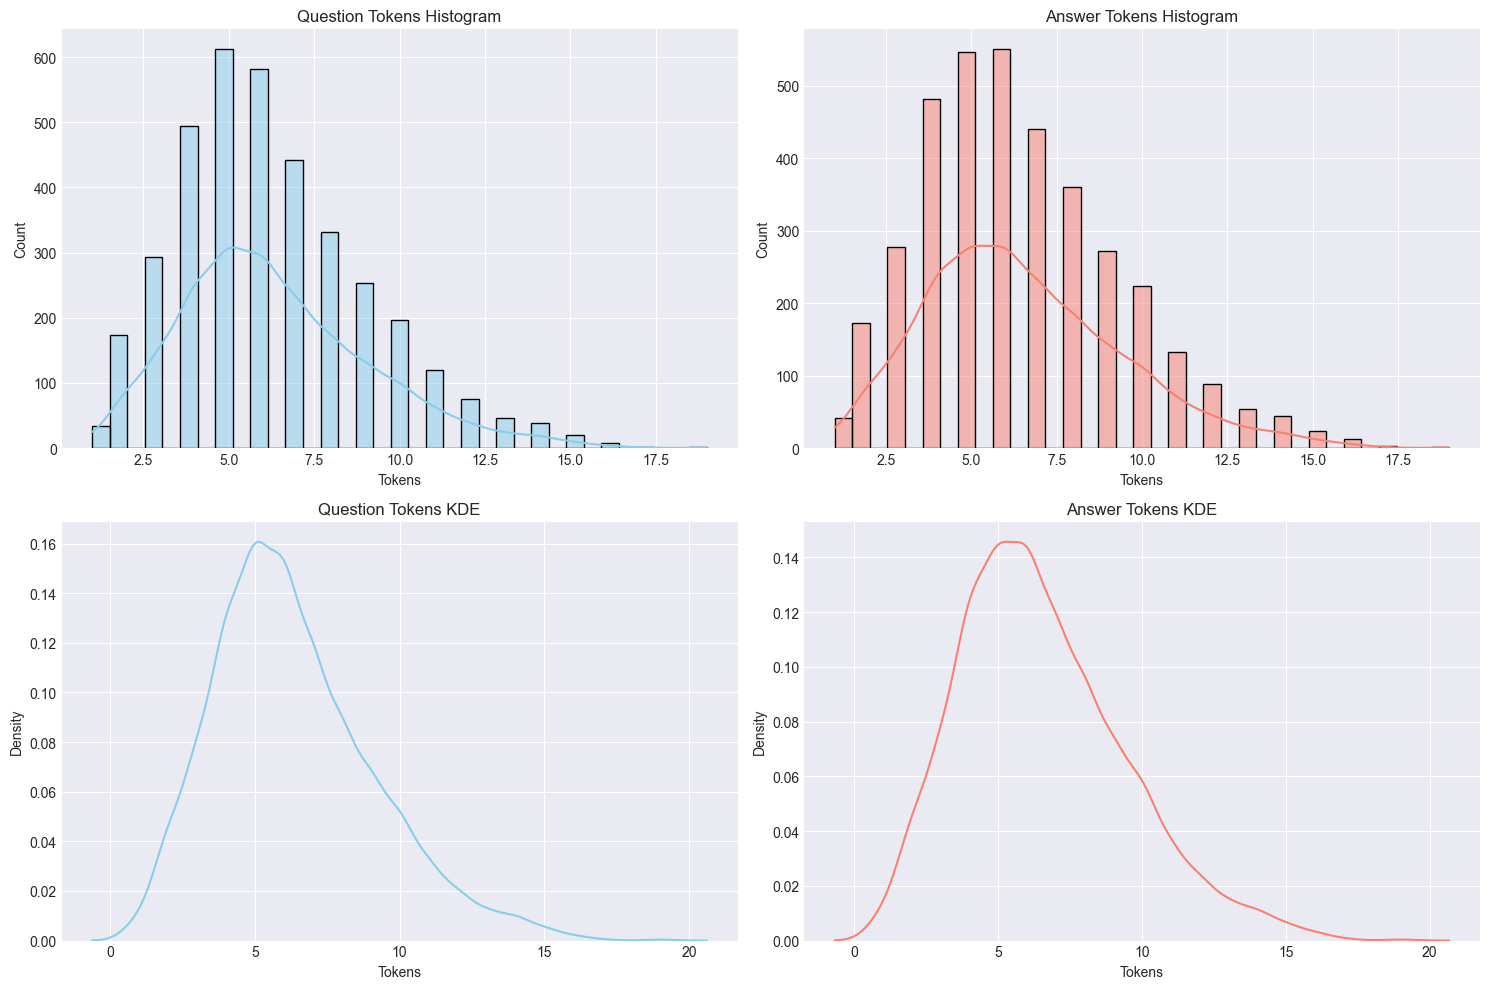

In [12]:
# Data Preprocessing

df['question tokens'] = df['Questions'].apply(lambda x: len(x.split()))
df['answer tokens'] = df['Answers'].apply(lambda x: len(x.split()))

# Create different types of plots
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Histograms
sns.histplot(x='question tokens', data=df, kde=True, ax=ax[0, 0], color='skyblue')
sns.histplot(x='answer tokens', data=df, kde=True, ax=ax[0, 1], color='salmon')

# KDE Plots
sns.kdeplot(x='question tokens', data=df, ax=ax[1, 0], color='skyblue')
sns.kdeplot(x='answer tokens', data=df, ax=ax[1, 1], color='salmon')

# Titles and labels
ax[0, 0].set_title('Question Tokens Histogram')
ax[0, 1].set_title('Answer Tokens Histogram')
ax[1, 0].set_title('Question Tokens KDE')
ax[1, 1].set_title('Answer Tokens KDE')

# Adding labels
ax[0, 0].set_xlabel('Tokens')
ax[0, 1].set_xlabel('Tokens')
ax[1, 0].set_xlabel('Tokens')
ax[1, 1].set_xlabel('Tokens')

plt.tight_layout()
plt.show()



In [6]:
#Function for converting upper to lower case
def cleaner(x):
    return [a for a in (''.join([a for a in x if a not in string.punctuation])).lower().split()]

In [13]:
Pipe = Pipeline([
    ('bow',CountVectorizer(analyzer=cleaner)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC(kernel='linear'))
])

Pipe.fit(df['Questions'],df['Answers'])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x00000283E2348A60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SVC(kernel='linear'))])

In [14]:
Pipe.fit(df['Questions'],df['Answers'])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x00000283E2348A60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SVC(kernel='linear'))])

In [15]:
Pipe.predict(["how's it going?"])[0]

"i'm doing well. how about you?"

In [16]:
Pipe.predict(["i'm fine. how about yourself?"])[0]

"i'm pretty good. thanks for asking."

In [22]:
Pipe.predict(["i'm actually in school right now."])[0]

'what school do you go to?'

In [28]:
Pipe.predict(["which school do you attend?"])[0]

"i'm attending pcc right now."

In [12]:
Pipe.predict(["great"])[0]

'i appreciate that.'

In [29]:
Pipe.predict(["it wouldn't rain in the middle of the summer."])[0]

"it wouldn't seem right if it started raining right now."